In [53]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (18,8)
%matplotlib inline

## histogram (theory)
- X-aixs of histogram corresponds with number of pixels on Y-axis
- each pixel has a color by RGB.
- each color has a brightness value ranging from 0 to 255
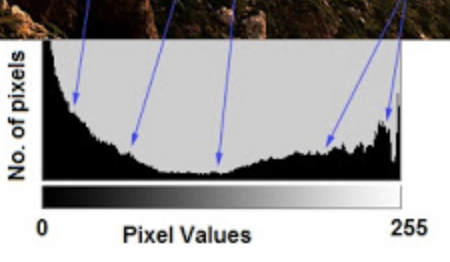
- 사진의 순서가 아닌 왼쪽부터 어두운 부분 -> 밝은 부분 픽셀의 양을 나타냄
- BINS : 모든 픽셀값에 대한 정보가 아닌 구간에 대한 정보
- DIMS : 1 (number of parameters from data) (강도 값만 구하기 때문에 1)
- RANGE : [0, 256]

In [12]:
img = cv2.imread('/users/sejongpyo/downloads/mt.jpg', 0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# (img, channels, mask, histSize, ranges)

# channels : if gray image -> [0]
#          : [0], [1], [2] for RGB channel
# mask     : full image -> None / specific mask for particular image
# histSize : BINS
# ranges   : normally [0, 256]

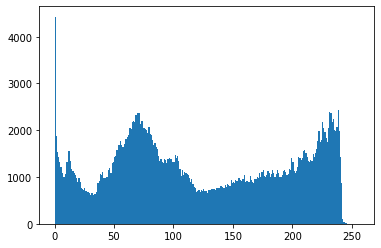

In [14]:
img = cv2.imread('/users/sejongpyo/downloads/mt.jpg', 0)
plt.hist(img.ravel(), 256, [0, 256])
plt.show()

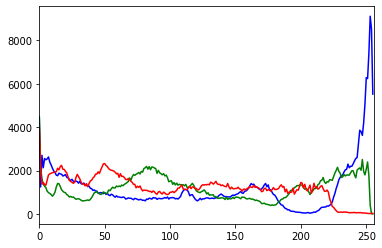

In [15]:
img = cv2.imread('/users/sejongpyo/downloads/mt.jpg')
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(histr, color = col)
    plt.xlim([0, 256])
plt.show()

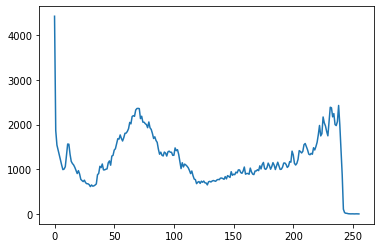

In [17]:
img = cv2.imread('/users/sejongpyo/downloads/mt.jpg', 0)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()

## mask (일부분만)

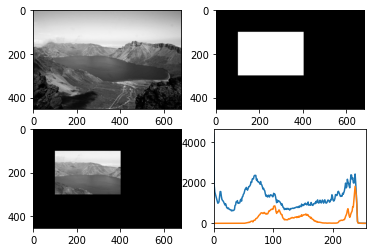

In [21]:
img = cv2.imread('/users/sejongpyo/downloads/mt.jpg', 0)

# mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img, img, mask = mask)

# hist
hist_full = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0, 256])

plt.show()

### histrogram equalization
- good image will have pixels from all regions of the image
- 너무 어둡거나 밝은 이미지의 경우, 픽셀의 분포가 한쪽으로 쏠려 있어 이미지가 뚜렷하지 않음
- 위의 방식을 통해 이를 평탄하게 함.

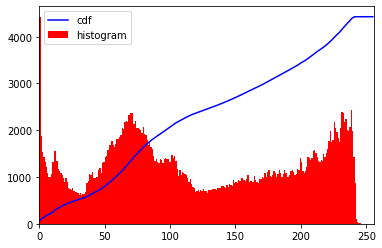

In [22]:
# numpy version
img = cv2.imread('/users/sejongpyo/downloads/mt.jpg', 0)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(), 256, [0, 256], color = 'r')
plt.xlim([0, 256])
plt.legend(('cdf', 'histogram'), loc = 'upper left')
plt.show()

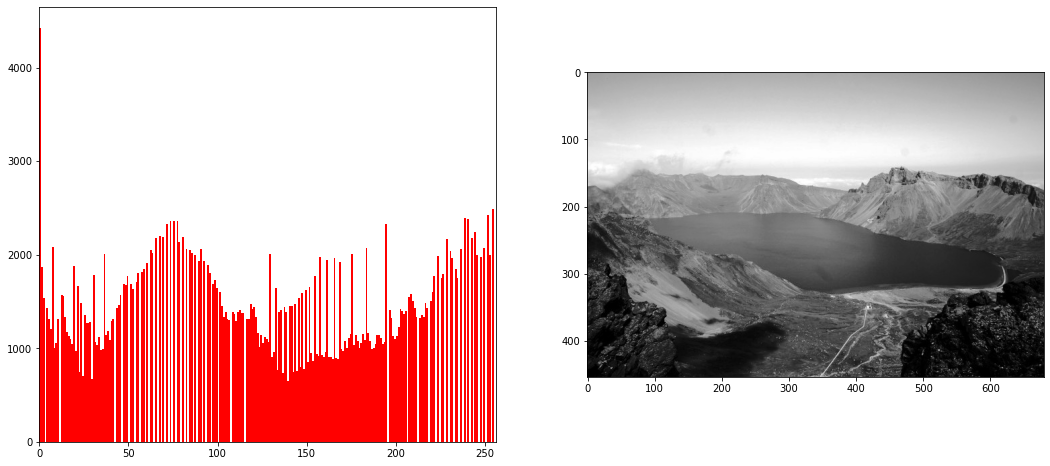

In [48]:
# numpy version
img = cv2.imread('/users/sejongpyo/downloads/mt.jpg', 0)

hist, bins = np.histogram(img.flatten(), 256, [0, 256])

cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf[img]

f, ax = plt.subplots(1, 2, figsize = (18, 8))
ax[0].hist(img2.flatten(), 256, [0, 256], color = 'r')
ax[0].set_xlim([0, 256])


ax[1].imshow(cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB))
plt.show()

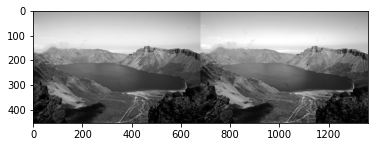

In [67]:
# opencv histogram
img = cv2.imread('/users/sejongpyo/downloads/mt.jpg', 0)

equ = cv2.equalizeHist(img)
res = np.hstack((img, equ)) # concat image side by side


plt.imshow(res, 'gray')
plt.show()

## adaptive histogram equalization
- img is divided into small blocks ('tiles')
- 'contrast limiting' -> if nay histogram bin is above the specified limit (default : 40), those pixels are clipped and distributed uniformly to other bins.
- 이미지의 구역을 나누어 평등화를 실시하는데 설정한 제한 수치 이상이면 다른 구간과 균일하게 맞추어 실시

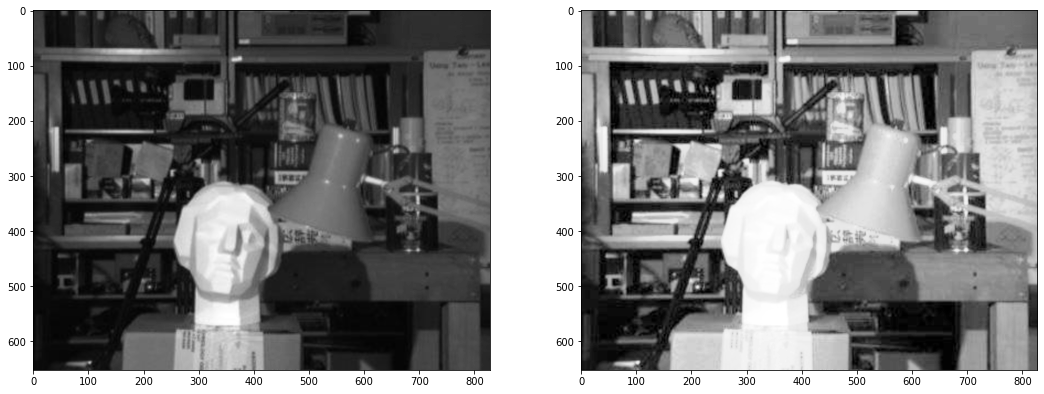

In [69]:
# global histogram equalization
img = cv2.imread('/users/sejongpyo/downloads/histo.png', 0)

equ = cv2.equalizeHist(img)

f, ax = plt.subplots(1, 2, figsize = (18, 8))
ax[0].imshow(img, 'gray')
ax[1].imshow(equ, 'gray')
plt.show()

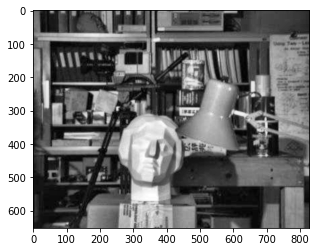

In [73]:
# adaptive histogram equalization
clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize = (8, 8))
cl1 = clahe.apply(img)

plt.imshow(cl1, 'gray')
plt.show()

# 2D histograms
- 위의 내용들은 grayscale intensity value of the pixel이기 때문에 1차원적인 내용만 다뤘었음
- color histogram으로 두 가지 변수는 Hue & Saturation

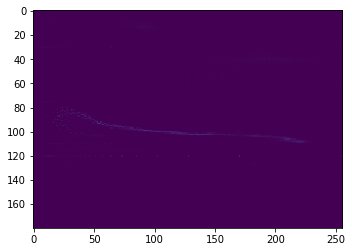

In [79]:
# opencv
# channels = [0, 1] -> H and S
# bins = [180, 256] -> H = 180, S = 256
# range = [0, 180, 0, 256]
# hue = (0 ~ 180), saturation = (0 ~ 256)

img = cv2.imread('/users/sejongpyo/downloads/mt.jpg')

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# interpolation falg가 있어야 더 좋은 결과가 나옴
plt.imshow(hist, interpolation = 'nearest')
plt.show()

In [81]:
# numpy

img = cv2.imread('/users/sejongpyo/downloads/mt.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

hist, xbins, ybins = np.histogram2d(h.ravel(), s.ravel(), [180, 256],
                                    [[0, 180], [0, 256]])

# histogram backprojection
- image segmentation 또는 finding objects에 사용
- it creates an image of the same size (single channel) and 설정한 구간과 동일한 픽셀들을 보여줌
- output image will have more white compared to remaining part
- use color histogram

In [82]:
# numpy
# 1. calculate the color histogram

# roi is the object or region of object we need to find
roi = cv2.imread('/users/sejongpyo/downloads/blue.png')
hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# target image
target = cv2.imread('/users/sejongpyo/downloads/mt.jpg')
hsvt = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)

# find the histograms using calcHist
# roi
M = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
I = cv2.calcHist([hsvt], [0, 1], None, [180, 256], [0, 180, 0, 256])

# 2. find ratio R = M / I -> backproject R (palette, create new image relevant to roi)
h, s, v = cv2.split(hsvt)
B = R[h.ravel(), s.ravel()]
B = np.minimum(B, 1)
B = B.reshape(hsvt.shape[:2])

# apply convolution with a circular disc, B = D * B ( D : disc kernel)
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cv2.filter2D(B, -1, disc, B)
B = np.uint8(B)
cv2.normalize(B, B, 0, 255, cv2.NORM_MINMAX)

ret, thresh = cv2.threshold(B, 50, 255, 0)

NameError: name 'R' is not defined

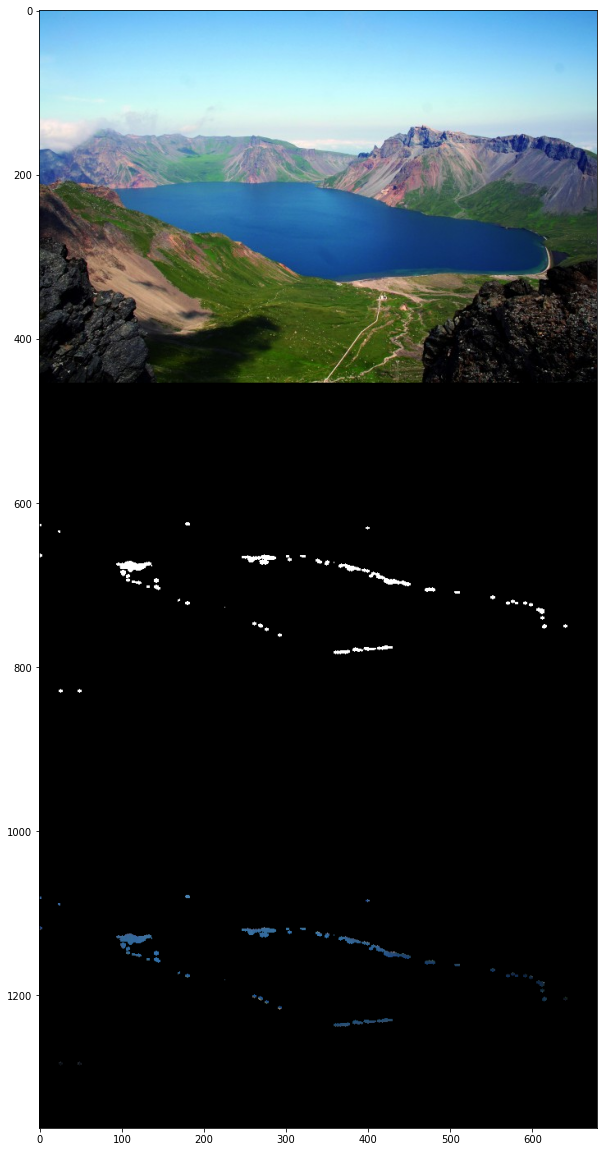

In [89]:
# opencv

# sample
roi = cv2.imread('/users/sejongpyo/downloads/blue.png')
hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# target image
target = cv2.imread('/users/sejongpyo/downloads/mt.jpg')
hsvt = cv2.cvtColor(target, cv2.COLOR_BGR2HSV)

# calculate object
roihist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])

# normalize histogram and backprojection
cv2.normalize(roihist, roihist, 0, 255, cv2.NORM_MINMAX)
dst = cv2.calcBackProject([hsvt], [0, 1], roihist, [0, 180, 0, 256], 1)

# convolute with circular disc
disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
cv2.filter2D(dst, -1, disc, dst)

# threshold and binary AND
ret, thresh = cv2.threshold(dst, 50, 255, 0)
thresh = cv2.merge((thresh, thresh, thresh))
res = cv2.bitwise_and(target, thresh)

f, ax = plt.subplots(figsize = (10, 25))
res = np.vstack((target, thresh, res))
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
ax.imshow(res)
plt.show()